In [2]:
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

dfZP = pd.read_csv('../data/train.csv')


In [7]:
dfZP.head(5)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [4]:
dfZP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

# Primera Parte - Verificamos datos


In [9]:
dfZP.shape

(240000, 23)

In [10]:
dfZP.dtypes


id                              int64
titulo                         object
descripcion                    object
tipodepropiedad                object
direccion                      object
ciudad                         object
provincia                      object
antiguedad                    float64
habitaciones                  float64
garages                       float64
banos                         float64
metroscubiertos               float64
metrostotales                 float64
idzona                        float64
lat                           float64
lng                           float64
fecha                          object
gimnasio                      float64
usosmultiples                 float64
piscina                       float64
escuelascercanas              float64
centroscomercialescercanos    float64
precio                        float64
dtype: object

In [4]:
dfZP.columns.values

array(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion',
       'ciudad', 'provincia', 'antiguedad', 'habitaciones', 'garages',
       'banos', 'metroscubiertos', 'metrostotales', 'idzona', 'lat',
       'lng', 'fecha', 'gimnasio', 'usosmultiples', 'piscina',
       'escuelascercanas', 'centroscomercialescercanos', 'precio'],
      dtype=object)

In [11]:
#Verificamos datos
print(dfZP['ciudad'].unique())


['Benito Juárez' 'La Magdalena Contreras' 'Tonalá' 'Zinacantepec'
 'Zapopan' 'Coyoacán' 'Oaxaca de Juárez' 'Playa del Carmen'
 'Villa de Alvarez' 'Ixtapaluca' 'San Luis Potosí'
 'San Pedro Garza García' 'Querétaro' 'Naucalpan de Juárez' 'Monterrey'
 'Ciudad Madero' 'Cancún' 'Apodaca' 'Puebla' 'Miguel Hidalgo' 'Mérida'
 'Huixquilucan' 'Emiliano Zapata' 'Tampico' 'Atizapán de Zaragoza'
 'Tlalpan' 'Acapulco de Juárez' 'Iztacalco' 'Villahermosa'
 'Cuautitlán Izcalli' 'Irapuato' 'Epazoyucan' 'Metepec' 'Cuauhtémoc'
 'Alvaro Obregón' 'Tultitlán' 'San Pedro Cholula' 'Venustiano Carranza'
 'Coacalco de Berriozábal' 'Valle de Bravo' 'Boca del Río'
 'Tlajomulco de Zúñiga' 'León' 'San Andrés Cholula' 'Chihuahua'
 'San Nicolás de los Garza' 'Santa Catarina' 'Aguascalientes' 'Cuernavaca'
 'Xochimilco' 'Tlalnepantla de Baz' 'Tequisquiapan' 'Hermosillo'
 'Montemorelos' 'Milpa Alta' 'Gustavo A. Madero' 'Morelia' 'Tijuana'
 'Jesús María' 'Guadalajara' 'La Paz' 'Chapala' 'Cuajimalpa de Morelos'
 'Delicia

In [12]:
#Verificamos datos
print(dfZP['provincia'].unique())

['Distrito Federal' 'Jalisco' 'Edo. de México' 'Oaxaca' 'Quintana Roo'
 'Colima' 'San luis Potosí' 'Nuevo León' 'Querétaro' 'Tamaulipas' 'Puebla'
 'Yucatán' 'Morelos' 'Guerrero' 'Tabasco' 'Guanajuato' 'Hidalgo'
 'Veracruz' 'Chihuahua' 'Aguascalientes' 'Sonora' 'Michoacán'
 'Baja California Norte' 'Baja California Sur' 'Coahuila' 'Durango'
 'Sinaloa' 'Chiapas' 'Nayarit' 'Tlaxcala' 'Campeche' 'Zacatecas' nan]


## Analisis de Precios

In [13]:
 dfZP[dfZP['precio'] > 10]

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,23650.0,19.300612,-99.148475,2014-03-18 00:00:00,0.0,0.0,0.0,0.0,1.0,1100000.0
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,NaN,3.0,1.0,...,73510.0,17.143504,-96.803504,2016-02-23 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.0,4.0,2.0,...,130510.0,20.672612,-87.037968,2016-10-20 00:00:00,0.0,0.0,0.0,0.0,0.0,4200000.0
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.0,2.0,1.0,...,9010.0,NaN,NaN,2014-01-06 00:00:00,0.0,0.0,0.0,1.0,1.0,310000.0
9,134537,terreno,"terreno de 5.500m2 bardeado, uso de suelo h-20...",Terreno,Av. Morelos,Ixtapaluca,Edo. de México,NaN,NaN,NaN,...,59171.0,19.316000,-98.887000,2016-12-22 00:00:00,0.0,0.0,0.0,0.0,0.0,6200000.0


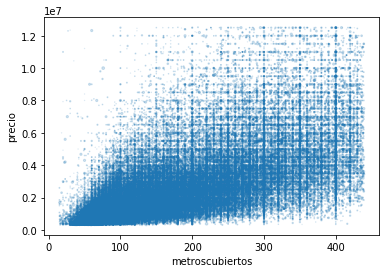

In [20]:

dfZP.plot.scatter( x='metroscubiertos', y='precio',s=dfZP['antiguedad'] * 0.1,alpha=0.2)


In [28]:
def valores_nulos(df):
    
    sum_null = df.isnull().sum()
    total = df.isnull().count()
    percent_nullvalues = 100* sum_null / total 
    
    print('Total',total)
    print('Null_Count',sum_null)
    print('Percent' ,round(percent_nullvalues,2))
    print(percent_nullvalues)
    
    df_null = pd.DataFrame()
    df_null['Total'] = total
    df_null['Null_Count'] = sum_null
    df_null['Percent'] = round(percent_nullvalues,2)
    df_null = df_null.sort_values(by='Null_Count',ascending = False)
    df_null = df_null[df_null.Null_Count > 0]
    
    return(df_null)

In [29]:
valores_nulos(dfZP)


Total id                            240000
titulo                        240000
descripcion                   240000
tipodepropiedad               240000
direccion                     240000
ciudad                        240000
provincia                     240000
antiguedad                    240000
habitaciones                  240000
garages                       240000
banos                         240000
metroscubiertos               240000
metrostotales                 240000
idzona                        240000
lat                           240000
lng                           240000
fecha                         240000
gimnasio                      240000
usosmultiples                 240000
piscina                       240000
escuelascercanas              240000
centroscomercialescercanos    240000
precio                        240000
dtype: int64
Null_Count id                                 0
titulo                          5387
descripcion                     1619
tipodepr

,Total,Null_Count,Percent
lng,240000,123488,51.45
lat,240000,123488,51.45
direccion,240000,53072,22.11
metrostotales,240000,51467,21.44
antiguedad,240000,43555,18.15
garages,240000,37765,15.74
idzona,240000,28621,11.93
banos,240000,26221,10.93
habitaciones,240000,22471,9.36
metroscubiertos,240000,17400,7.25


In [30]:
def valoresNulos(columna):
    
    suma_null = columna.isnull().sum()
    total = columna.isnull().count()
    porcentaje_nulos = round(100* suma_null / total,2)
    print (columna.name.ljust(30)  ,'{:6d}'.format(total) ,'{:19d}'.format(suma_null)  , '{:9.2f}'.format(porcentaje_nulos)+"%")
    return 


In [32]:
print ("Columna".ljust(30)+" Total       Cantidad Nulos    %Nulos ")
for col in dfZP.columns:
    valoresNulos(dfZP[col])
    #print(sum_null,total,percent_nullvalues)


Columna                        Total       Cantidad Nulos    %Nulos 
id                             240000                   0      0.00%
titulo                         240000                5387      2.24%
descripcion                    240000                1619      0.67%
tipodepropiedad                240000                  46      0.02%
direccion                      240000               53072     22.11%
ciudad                         240000                 372      0.16%
provincia                      240000                 155      0.06%
antiguedad                     240000               43555     18.15%
habitaciones                   240000               22471      9.36%
garages                        240000               37765     15.74%
banos                          240000               26221     10.93%
metroscubiertos                240000               17400      7.25%
metrostotales                  240000               51467     21.44%
idzona                         240

In [17]:
dfZP.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [33]:
dfZP[dfZP['tipodepropiedad'] == 'Apartamento']

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,23650.0,19.300612,-99.148475,2014-03-18 00:00:00,0.0,0.0,0.0,0.0,1.0,1100000.0
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.0,2.0,1.0,...,9010.0,NaN,NaN,2014-01-06 00:00:00,0.0,0.0,0.0,1.0,1.0,310000.0
11,103293,"departamento en venta, san pedro garza garcia,...","departamento nuevo ,256 m2 de construccion,un ...",Apartamento,NaN,San Pedro Garza García,Nuevo León,NaN,3.0,2.0,...,325095.0,NaN,NaN,2014-12-01 00:00:00,0.0,0.0,0.0,0.0,0.0,7200000.0
17,73348,"oportunidad, departamento col del valle, 3 rec...",magnifico departamento con excelente distribuc...,Apartamento,Pazaje Santa Cruz,Benito Juárez,Distrito Federal,5.0,3.0,2.0,...,50003995.0,NaN,NaN,2016-10-30 00:00:00,0.0,0.0,0.0,1.0,1.0,4750000.0
30,257302,NaN,-- hav1407e-285 -- excelente departamento e...,Apartamento,Rio Mante .,Ciudad Madero,Tamaulipas,0.0,2.0,1.0,...,104721.0,NaN,NaN,2016-04-08 00:00:00,0.0,0.0,0.0,0.0,0.0,750000.0
39,127666,hermoso departamento!!!,hermoso departamento con acabados de muy buen ...,Apartamento,LAS COLONIAS,Atizapán de Zaragoza,Edo. de México,20.0,2.0,1.0,...,55716.0,NaN,NaN,2015-01-05 00:00:00,0.0,0.0,0.0,1.0,1.0,980000.0
41,212847,departamento en arcos de zapopan,bonito departamento muy bien ubicado en planta...,Apartamento,ARCO PERTINAX,Zapopan,Jalisco,10.0,2.0,1.0,...,311049.0,NaN,NaN,2016-05-22 00:00:00,0.0,0.0,0.0,0.0,0.0,525000.0
43,224685,renta en acapulco con alberca prvada vista a b...,bonito departamento cerca de sam´s club farall...,Apartamento,RANCHO ACAPULCO,Acapulco de Juárez,Guerrero,3.0,2.0,1.0,...,37846.0,NaN,NaN,2014-06-29 00:00:00,0.0,0.0,1.0,1.0,1.0,1450000.0


In [34]:
dfZP['total'] = 1

# Cantidad de Tipos de Propiedad Publicadas

In [113]:
dfTipodepropiedad = dfZP.groupby('tipodepropiedad').count()['total'].sort_values(ascending=False).to_frame()

In [114]:
dfTipodepropiedad

,total
tipodepropiedad,
Casa,141717
Apartamento,57341
Casa en condominio,19297
Terreno,9945
Local Comercial,3055
Oficina comercial,1741
Bodega comercial,1406
Edificio,1396
Terreno comercial,1326


In [115]:

dfTipodepropiedad_grafico.reset_index()


,tipodepropiedad,total
0,Casa,141717
1,Apartamento,57341
2,Casa en condominio,19297
3,Terreno,9945
4,Local Comercial,3055
5,Oficina comercial,1741
6,Bodega comercial,1406
7,Edificio,1396
8,Terreno comercial,1326
9,Casa uso de suelo,708


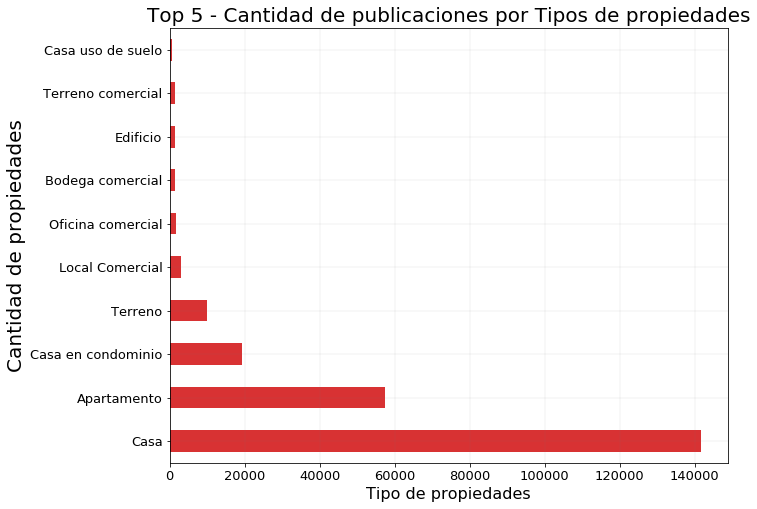

In [118]:
dfTipodepropiedad_grafico['total'].head(10).plot(kind='barh', rot=0, figsize=(10,8), color='tab:red', alpha = 0.95 ,fontsize=13)
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.5)

plt.title('Top 5 - Cantidad de publicaciones por Tipos de propiedades', fontsize=20);
plt.xlabel('Tipo de propiedades', fontsize=16);
plt.ylabel('Cantidad de propiedades', fontsize=20);

Como es de esperarse la cantidad de publicaciones mayoritariamente son de Casas y Apartamentos.

# CIUDAD CON MAS PUBLICACIONES

In [120]:
dfProvincia_grafico = dfZP.groupby('provincia').sum()['total'].sort_values(ascending=False).to_frame()

In [121]:
dfProvincia_grafico

,total
provincia,
Distrito Federal,58790
Edo. de México,41607
Jalisco,21238
Querétaro,16988
Nuevo León,15324
Puebla,10421
San luis Potosí,8447
Yucatán,7928
Morelos,7337


In [122]:
dfProvincia_grafico['total'].head(10)

provincia
Distrito Federal    58790
Edo. de México      41607
Jalisco             21238
Querétaro           16988
Nuevo León          15324
Puebla              10421
San luis Potosí      8447
Yucatán              7928
Morelos              7337
Veracruz             5762
Name: total, dtype: int64

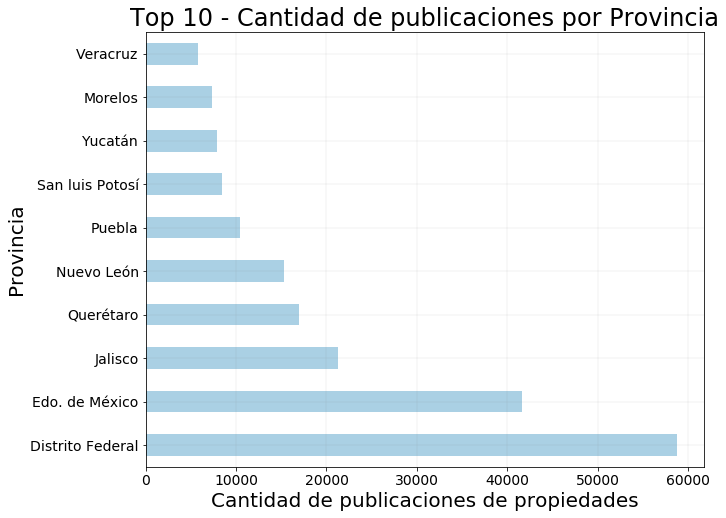

In [123]:
dfProvincia_grafico['total'].head(10).plot(kind='barh', rot=0, figsize=(10,8), colormap='Paired', alpha = 0.95, fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.5)
plt.title('Top 10 - Cantidad de publicaciones por Provincia', fontsize=24);
plt.xlabel('Cantidad de publicaciones de propiedades', fontsize=20);
plt.ylabel('Provincia', fontsize=20);

El DF es la ciudad con mayor cantidad de publicaciones

# Veamos si existen publicaciones duplicadas

In [92]:
dfPublicacionesDuplicadas = dfZP.groupby(['titulo','tipodepropiedad','direccion','ciudad','provincia','antiguedad','precio']).count()['total'].to_frame()

In [94]:
dfPublicacionesDuplicadas = dfPublicacionesDuplicadas['total'].sort_values(ascending=False).to_frame()
dfPublicacionesDuplicadas[dfPublicacionesDuplicadas['total'] > 1]

,,,,,,,total
titulo,tipodepropiedad,direccion,ciudad,provincia,antiguedad,precio,
oriente 172 (av. emiliano zapata) - vendo casa,Casa,ORIENTE 172,Iztapalapa,Distrito Federal,20.0,4180000.0,2
ex hacienda santa ines,Casa,santa ines,Nextlalpan,Edo. de México,5.0,330000.0,2
santa elena,Casa,santa elena,Cuautitlán,Edo. de México,10.0,490000.0,2
casa a 10 minutos del centro de cuernavaca,Casa,Ahuatepec,Cuernavaca,Morelos,1.0,660000.0,2
"casa tlalnepantla, nezahualcoyotl",Casa,tlalnepantla,Nezahualcóyotl,Edo. de México,20.0,1150000.0,2


Al menos en esta primera observacion no vemos una cantidad importante de duplicados.

In [99]:

dfZP[dfZP['titulo'] == 'oriente 172 (av. emiliano zapata) - vendo casa']

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,total
60753,74689,oriente 172 (av. emiliano zapata) - vendo casa,ubicadisima! en oriente 172 (continuación av. ...,Casa,ORIENTE 172,Iztapalapa,Distrito Federal,20.0,3.0,3.0,...,19.363257,-99.134857,2016-05-03 00:00:00,0.0,1.0,0.0,1.0,1.0,4180000.0,1
108914,270103,oriente 172 (av. emiliano zapata) - vendo casa,ubicadisima! en oriente 172 (continuación av. ...,Casa,ORIENTE 172,Iztapalapa,Distrito Federal,20.0,3.0,3.0,...,19.363250,-99.134872,2016-05-03 00:00:00,0.0,1.0,0.0,1.0,1.0,4180000.0,1


In [100]:
dfZP[dfZP['titulo'] == 'casa a 10 minutos del centro de cuernavaca']

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,total
135767,224380,casa a 10 minutos del centro de cuernavaca,<p>hermosa casa en venta. ubicada en ahuatepec...,Casa,Ahuatepec,Cuernavaca,Morelos,1.0,2.0,1.0,...,18.971628,-99.208279,2013-11-07 00:00:00,0.0,0.0,0.0,1.0,1.0,660000.0,1
159945,159676,casa a 10 minutos del centro de cuernavaca,<p>hermosa casa en venta. ubicada en ahuatepec...,Casa,Ahuatepec,Cuernavaca,Morelos,1.0,2.0,1.0,...,18.976832,-99.207718,2014-02-18 00:00:00,0.0,0.0,0.0,1.0,1.0,660000.0,1


In [101]:
dfZP[dfZP['titulo'] == 'casa tlalnepantla, nezahualcoyotl']

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,total
28448,169698,"casa tlalnepantla, nezahualcoyotl",planta baja. \nestacionamiento para 3 autos. \...,Casa,tlalnepantla,Nezahualcóyotl,Edo. de México,20.0,4.0,3.0,...,19.388021,-99.010158,2014-08-09 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0,1
201711,6646,"casa tlalnepantla, nezahualcoyotl",características del inmueble: \nárea de terren...,Casa,tlalnepantla,Nezahualcóyotl,Edo. de México,20.0,4.0,3.0,...,19.384557,-99.012022,2014-05-18 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0,1
